In [19]:
## Activity 1 using python

## Installing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math

In [20]:
## Importing the datasets

df1 = pd.read_csv("/Users/junlongng/Desktop/NTU/Year_2/Semester 2/BC2407 Analytics II/BC2407 Course Materials/S2 Review of Basic Analytics/default.csv",dtype= {'Default':'category', "Gender": "category"})
df1.head()

,Default,Gender,AvgBal,Income
0,No,M,730,44362
1,No,F,817,12106
2,No,M,1074,31767
3,No,M,529,35704
4,No,M,786,38463


In [21]:
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


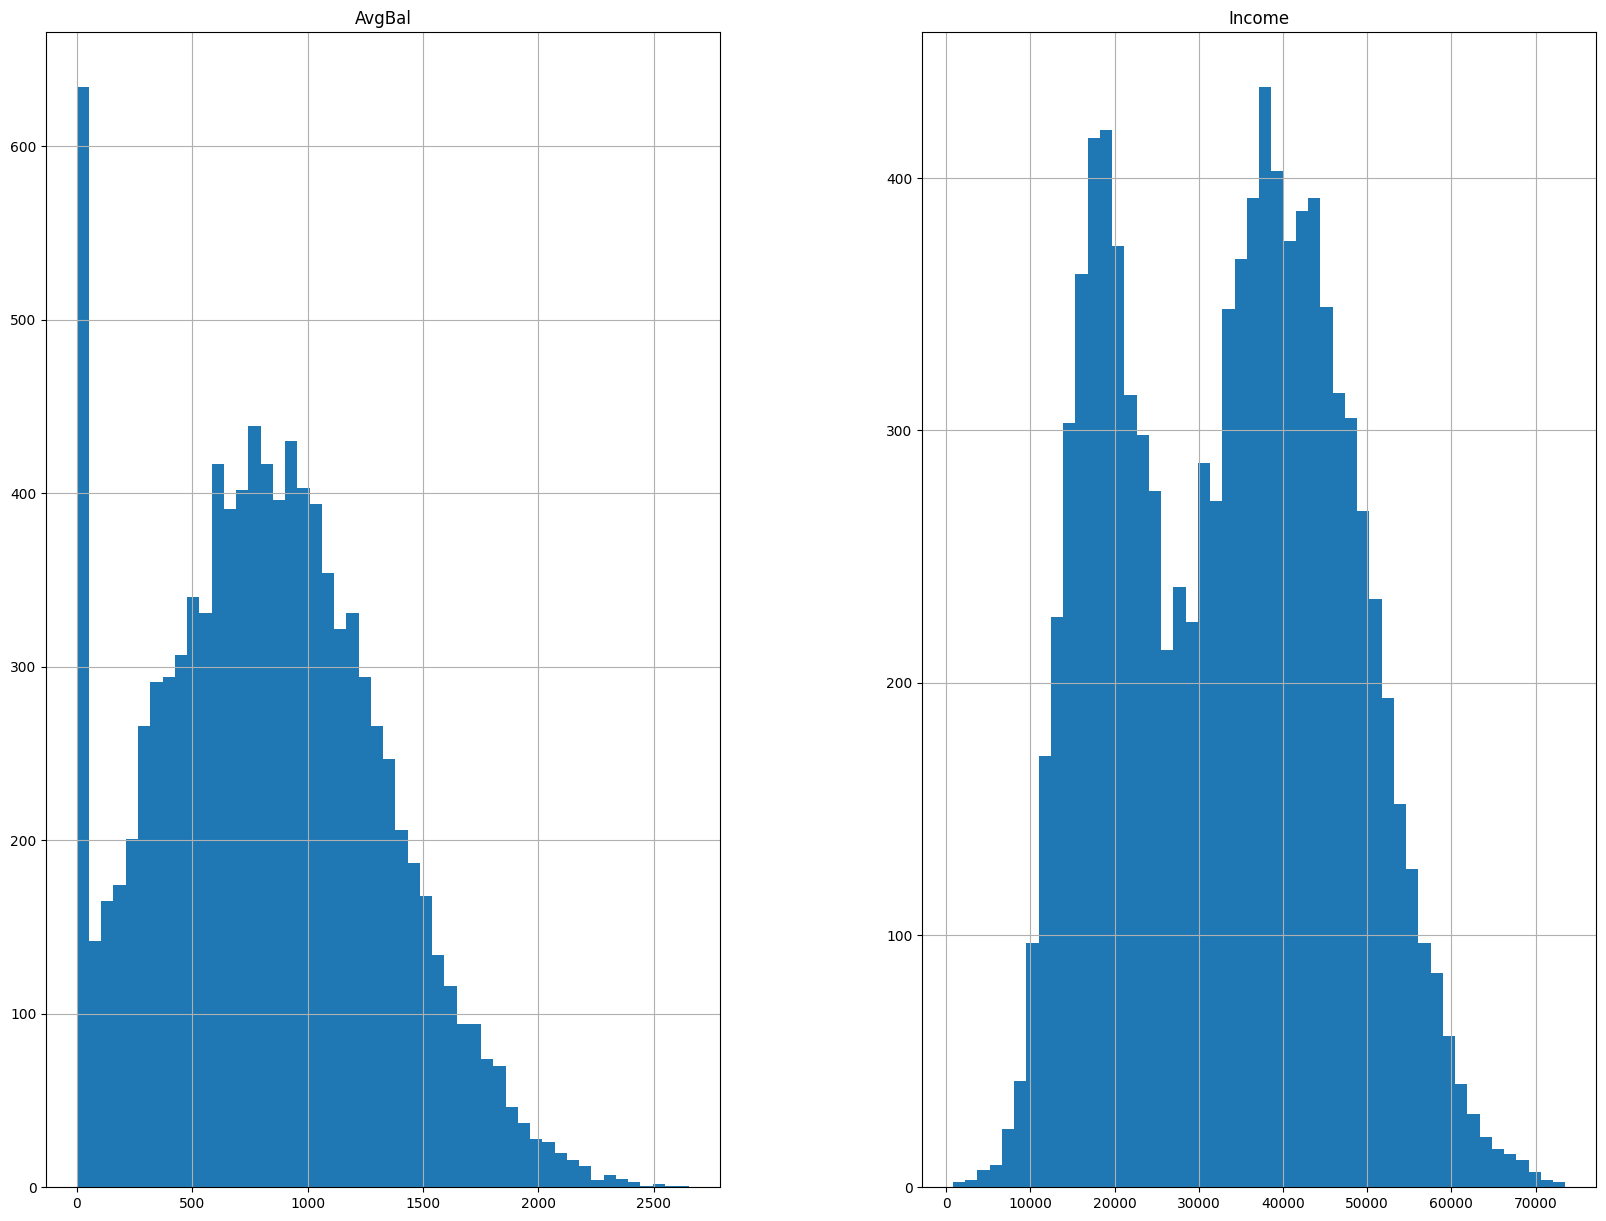

In [22]:
## Plotting some graphs
df1.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Default', ylabel='Default'>,
        <AxesSubplot:xlabel='Gender', ylabel='Default'>,
        <AxesSubplot:xlabel='AvgBal', ylabel='Default'>,
        <AxesSubplot:xlabel='Income', ylabel='Default'>],
       [<AxesSubplot:xlabel='Default', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='AvgBal', ylabel='Gender'>,
        <AxesSubplot:xlabel='Income', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Default', ylabel='AvgBal'>,
        <AxesSubplot:xlabel='Gender', ylabel='AvgBal'>,
        <AxesSubplot:xlabel='AvgBal', ylabel='AvgBal'>,
        <AxesSubplot:xlabel='Income', ylabel='AvgBal'>],
       [<AxesSubplot:xlabel='Default', ylabel='Income'>,
        <AxesSubplot:xlabel='Gender', ylabel='Income'>,
        <AxesSubplot:xlabel='AvgBal', ylabel='Income'>,
        <AxesSubplot:xlabel='Income', ylabel='Income'>]], dtype=object)

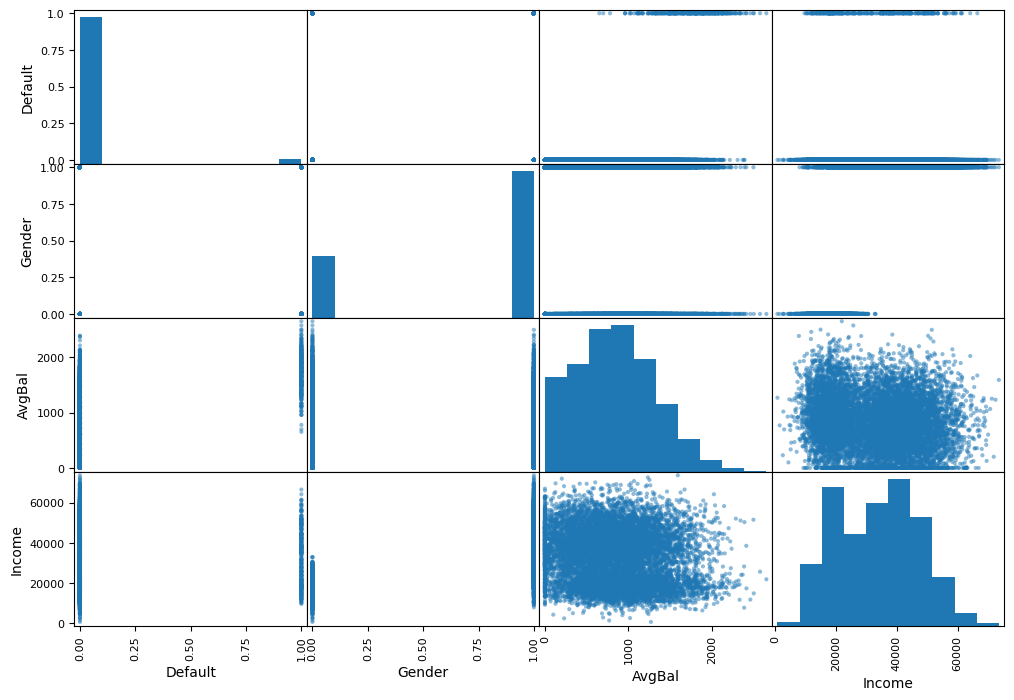

In [27]:
## Looking at some scatter graphs
from pandas.plotting import scatter_matrix

attributes = ["Default", "Gender", "AvgBal", "Income"]
scatter_matrix(df1[attributes], figsize = (12,8))

In [26]:
## Looking For Correlations
corr_matrix = df1.corr()
corr_matrix['Default'].sort_values(ascending=False)
## Shows us that Avg Bal is the most correlated to the Default status

Default    1.000000
AvgBal     0.350124
Income    -0.019872
Gender    -0.035420
Name: Default, dtype: float64

In [23]:
## Checking for NA values
df1.info()

## This shows us that we need to recode Default & Gender
## Refer to first block 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Default  10000 non-null  category
 1   Gender   10000 non-null  category
 2   AvgBal   10000 non-null  int64   
 3   Income   10000 non-null  int64   
dtypes: category(2), int64(2)
memory usage: 176.0 KB


In [24]:
## python cannot automatically interpret strings as category
## so we need to encode the respective categories with the number codes
df1.Default = df1.Default.cat.codes
df1.Gender = df1.Gender.cat.codes

In [25]:
## Creating train test split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df1, test_size = 0.2, random_state=420)

In [28]:
x_data = train_set[['Gender', 'AvgBal', 'Income']]
target_y = train_set['Default']
log_reg = LogisticRegression()
log_reg.fit(x_data, target_y)
## Predicting Target Y
pred_y = log_reg.predict(x_data)
y_prob = log_reg.predict_proba(x_data)
y_prob



array([[0.91880864, 0.08119136],
       [0.99202685, 0.00797315],
       [0.99670406, 0.00329594],
       ...,
       [0.86756555, 0.13243445],
       [0.99490373, 0.00509627],
       [0.86477684, 0.13522316]])